In [1]:
import pandas as pd 

import sys
sys.path.append('../src') 

from distances import euclidean_v2
from preprocess import *

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading the datasets

In [3]:
df = pd.read_csv('../data/robotarm.csv')

In [4]:
robotarm_l1 = df[df['activity'] == 1]
robotarm_l2 = df[df['activity'] == 2]
robotarm_l3 = df[df['activity'] == 3]

# World space bucketization

In [5]:
def plots_distribution(dfs, column): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.histplot(dfs[0][column], bins=20, kde=True, ax=ax[0])
    ax[0].set_title("Task 1")
    ax[0].set_xlabel("Successive distance")
    ax[0].set_ylabel("Frequency")

    sns.histplot(dfs[1][column], bins=20, kde=True, ax=ax[1])
    ax[1].set_title("Task 2")
    ax[1].set_xlabel("Successive distance")
    ax[1].set_ylabel("Frequency")

    sns.histplot(dfs[2][column], bins=20, kde=True, ax=ax[2])
    ax[2].set_title("Task 3")
    ax[2].set_xlabel("Successive distance")
    ax[2].set_ylabel("Frequency")
    
    plt.savefig("../plot/plot_report/distribution_split_successive_distances.png")
    
    
def plots_distribution_success(dfs, column): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    sns.histplot(dfs[0][dfs[0]['success'] == 1][column], bins=20, kde=True, ax=ax[0], label='Success')
    sns.histplot(dfs[0][dfs[0]['success'] == 0][column], bins=20, kde=True, ax=ax[0], label='Failure')
    ax[0].set_title("Task 1")
    ax[0].set_xlabel("Successive distance")
    ax[0].set_ylabel("Frequency")
    ax[0].legend()

    sns.histplot(dfs[1][dfs[1]['success'] == 1][column], bins=20, kde=True, ax=ax[1], label='Success')
    sns.histplot(dfs[1][dfs[1]['success'] == 0][column], bins=20, kde=True, ax=ax[1], label='Failure')
    ax[1].set_title("Task 2")
    ax[1].set_xlabel("Successive distance")
    ax[1].set_ylabel("Frequency")
    ax[1].legend()

    sns.histplot(dfs[2][dfs[2]['success'] == 1][column], bins=20, kde=True, ax=ax[2], label='Success')
    sns.histplot(dfs[2][dfs[2]['success'] == 0][column], bins=20, kde=True, ax=ax[2], label='Failure')
    ax[2].set_title("Task 3")
    ax[2].set_xlabel("Successive distance")
    ax[2].set_ylabel("Frequency")
    ax[2].legend()
    
    plt.savefig("../plot/plot_report/distribution_split_successive_distances_success.png")

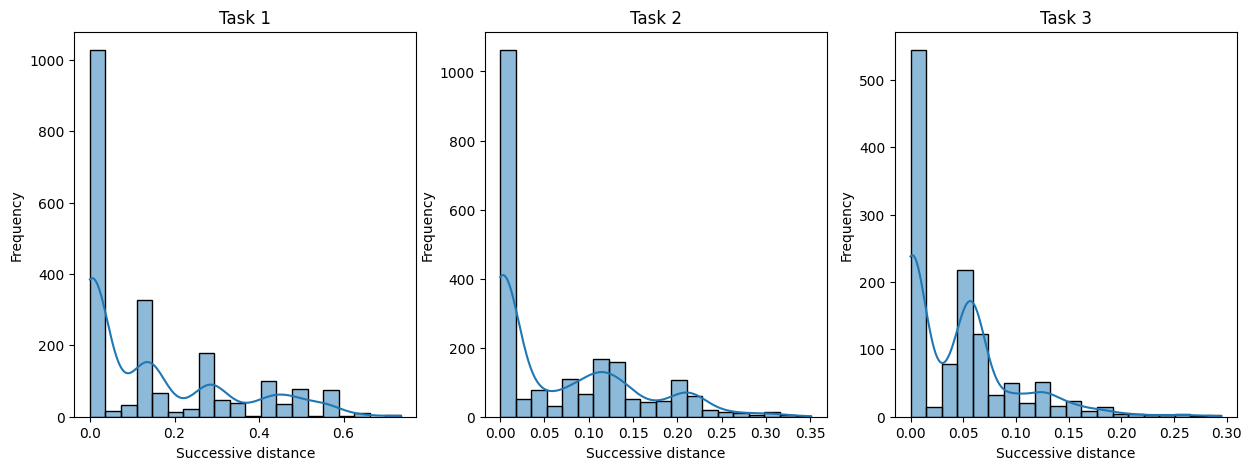

In [6]:
plots_distribution([robotarm_l1, robotarm_l2, robotarm_l3], 'delta_successive')

In [7]:
def find_minimum(df, column): 
    data = df[column]

    # Compute the KDE
    kde = gaussian_kde(data)

    # Evaluate the KDE at a range of points
    x_values = np.linspace(data.min(), data.max(), 1000)
    kde_values = kde.evaluate(x_values)

    # Invert the KDE values to find local minima instead of maxima
    inverted_kde_values = -kde_values

    # Find local minima using find_peaks
    minima_indices, _ = find_peaks(inverted_kde_values)

    local_minima = x_values[minima_indices]

    print("Local minima of the KDE curve:")
    for minimum in local_minima:
        print("x =", minimum)
       
    return local_minima[0]

In [8]:
global_mins = []

for idx, df in enumerate([robotarm_l1, robotarm_l2, robotarm_l3]):
    min_kde_value = find_minimum(df, 'delta_successive')
    global_mins.append(min_kde_value)

    print(f"Global minimum of the KDE curve for task {idx} :", min_kde_value)

Local minima of the KDE curve:
x = 0.09051942901624768
x = 0.22077909516157973
x = 0.3694370192370434
Global minimum of the KDE curve for task 0 : 0.09051942901624768
Local minima of the KDE curve:
x = 0.05870041610849463
x = 0.17574974882782823
Global minimum of the KDE curve for task 1 : 0.05870041610849463
Local minima of the KDE curve:
x = 0.03009920426000942
x = 0.1056423051478762
x = 0.23341637813399463
Global minimum of the KDE curve for task 2 : 0.03009920426000942


In [10]:
for df, thresh in zip([robotarm_l1, robotarm_l2, robotarm_l3], global_mins):
    df['bucket_delta_successive'] = df['delta_successive'].apply(lambda x: "low" if x <= thresh else "high")

* As observed previously, we have a lot of outliers: let's consider uniquely the curve of the students that did all 3 activities ! 

In [11]:
robotarm = pd.concat([robotarm_l1, robotarm_l2, robotarm_l3])

# indicate all the activities the student has done

student_activity = robotarm.groupby('Student ID').agg({'activity': 'unique'}).reset_index()
student_activity['activity_all'] = student_activity['activity'].apply(lambda x: ''.join(map(str, x)))
student_to_activity_dict = dict(zip(student_activity['Student ID'], student_activity['activity_all']))

robotarm['activity_all'] = robotarm['Student ID'].map(student_to_activity_dict)

In [12]:
robotarm_all = robotarm[robotarm['activity_all'] == '123']

robotarm_all_l1 = robotarm_all[robotarm_all['activity'] == 1]
robotarm_all_l2 = robotarm_all[robotarm_all['activity'] == 2]
robotarm_all_l3 = robotarm_all[robotarm_all['activity'] == 3]

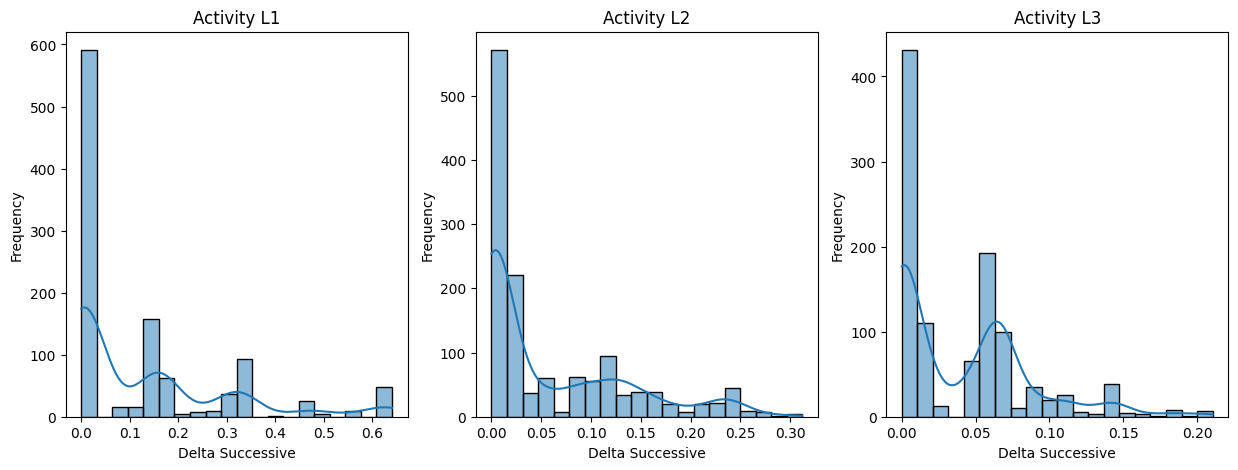

In [13]:
plots_distribution([robotarm_all_l1, robotarm_all_l2, robotarm_all_l3], 'delta_successive')

In [14]:
global_mins = []

for idx, df in enumerate([robotarm_all_l1, robotarm_all_l2, robotarm_all_l3]):
    min_kde_value = find_minimum(df, 'delta_successive')
    global_mins.append(min_kde_value)

    print(f"Global minimum of the KDE curve for task {idx} :", min_kde_value)

Local minima of the KDE curve:
x = 0.0999887268307832
x = 0.2506127704540784
x = 0.42559304240794904
x = 0.5364779766497791
Global minimum of the KDE curve for task 0 : 0.0999887268307832
Local minima of the KDE curve:
x = 0.06628395899976874
x = 0.19728857607950037
Global minimum of the KDE curve for task 1 : 0.06628395899976874
Local minima of the KDE curve:
x = 0.03415211549742469
x = 0.12712176324041413
x = 0.1745552569868373
Global minimum of the KDE curve for task 2 : 0.03415211549742469


In [15]:
for df, thresh in zip([robotarm_l1, robotarm_l2, robotarm_l3], global_mins):
    df['bucket_delta_successive'] = df['delta_successive'].apply(lambda x: "low" if x <= thresh else "high")

* Lets observe the difference between successful and failing students ! 

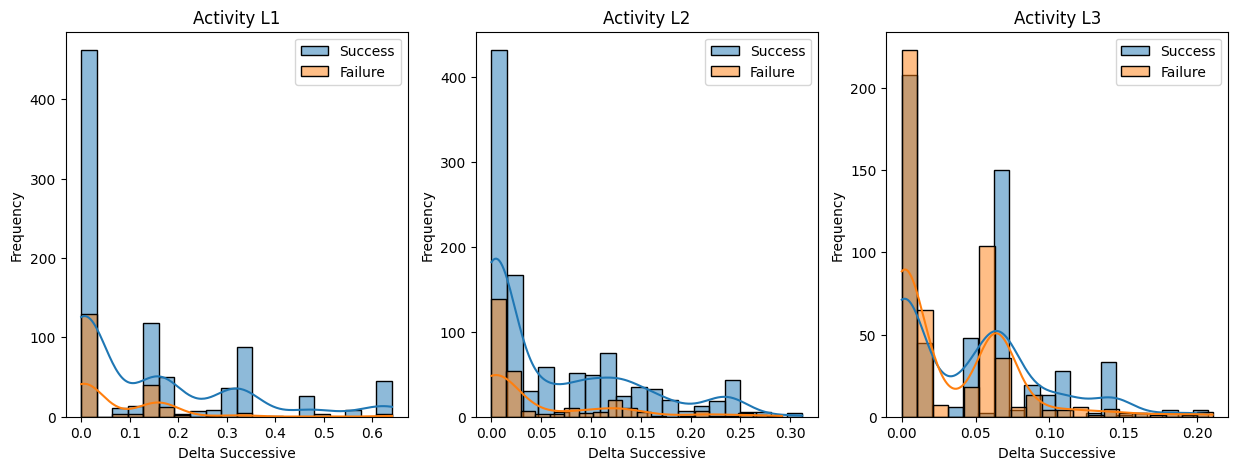

In [16]:
plots_distribution_success([robotarm_all_l1, robotarm_all_l2, robotarm_all_l3], 'delta_successive')

* Lets see what it looks like when not filtered

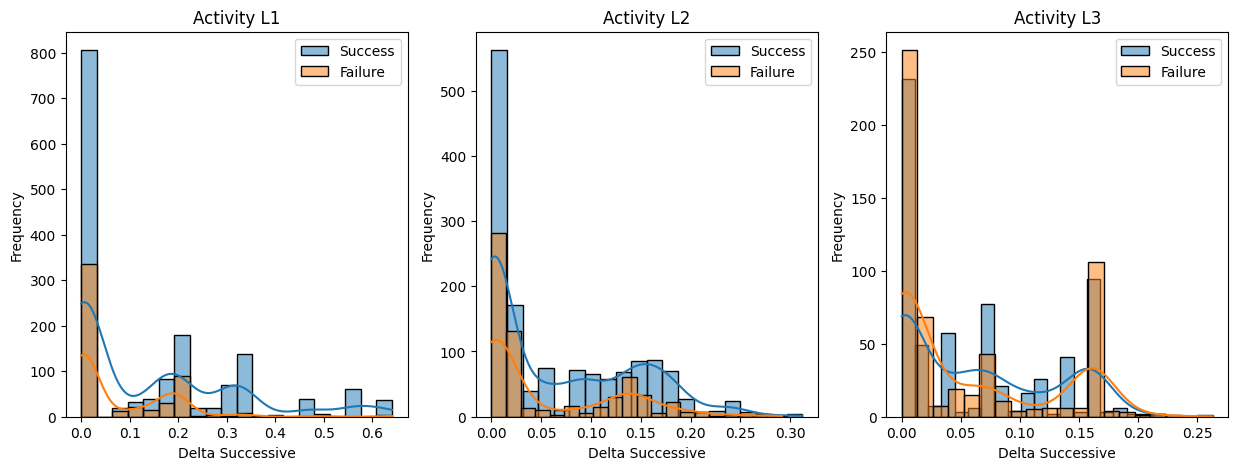

In [68]:
plots_distribution_success([robotarm_l1, robotarm_l2, robotarm_l3], 'delta_successive')

In [69]:
find_minimum(robotarm_l1[robotarm_l1['success'] == 1], 'delta_successive')

Local minima of the KDE curve:
x = 0.10768016735622807
x = 0.2621499312422457
x = 0.4230292288994674
x = 0.49994363415391607


0.10768016735622807

In [70]:
find_minimum(robotarm_l1[robotarm_l1['success'] == 0], 'delta_successive')

Local minima of the KDE curve:
x = 0.09357919305957917
x = 0.2858652061957007
x = 0.41661969512826336
x = 0.5601932516032342


0.09357919305957917

In [71]:
find_minimum(robotarm_all_l1[robotarm_all_l1['success'] == 1], 'delta_successive')

Local minima of the KDE curve:
x = 0.1115258876189505
x = 0.26471374475072734
x = 0.4287978092935511


0.1115258876189505

In [72]:
find_minimum(robotarm_all_l1[robotarm_all_l1['success'] == 0], 'delta_successive')

Local minima of the KDE curve:
x = 0.10768016735622807
x = 0.4307206694249123
x = 0.5454513239294648


0.10768016735622807

In [73]:
robotarm = pd.concat([robotarm_l1, robotarm_l2, robotarm_l3])

In [74]:
robotarm.to_csv("../data/robotarm.csv", index=False)

In [75]:
robotarm.columns

Index(['Student ID', 'WorldSpace', 'index', 'Submission_TreeDist_Successive',
       'nb_tentative', 'pct_activity', 'error', 'missing', 'move1', 'move2',
       'pickup1', 'place1', 'nb_error', 'nb_missing', 'nb_move1', 'nb_move2',
       'nb_pickup1', 'nb_place1', 'pct_error', 'pct_missing', 'pct_move1',
       'pct_move2', 'pct_pickup1', 'pct_place1', 'euclidean_distance',
       'delta_successive', 'success', 'has_error', 'activity', 'seq_error',
       'case1', 'case2', 'case3', 'cases', 'activity_all',
       'bucket_delta_successive'],
      dtype='object')

# Code space bucketization

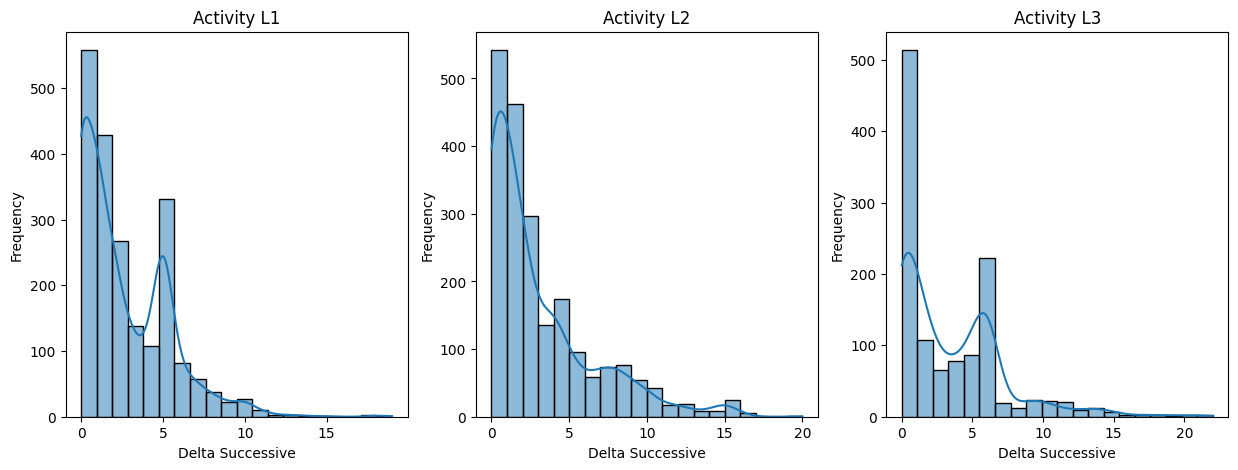

In [76]:
plots_distribution([robotarm_l1, robotarm_l2, robotarm_l3], 'Submission_TreeDist_Successive')

In [77]:
for df in [robotarm_l1, robotarm_l2, robotarm_l3]:
    min_kde_value = find_minimum(df, 'Submission_TreeDist_Successive')
    print(f"Global minimum of the KDE curve for task :", min_kde_value)

Local minima of the KDE curve:
x = 3.5945945945945947
x = 16.413413413413416
Global minimum of the KDE curve for task : 3.5945945945945947
Local minima of the KDE curve:
x = 6.426426426426427
x = 13.393393393393394
x = 18.2982982982983
Global minimum of the KDE curve for task : 6.426426426426427
Local minima of the KDE curve:
x = 3.5235235235235236
x = 8.6986986986987
x = 12.486486486486486
x = 19.48948948948949
Global minimum of the KDE curve for task : 3.5235235235235236


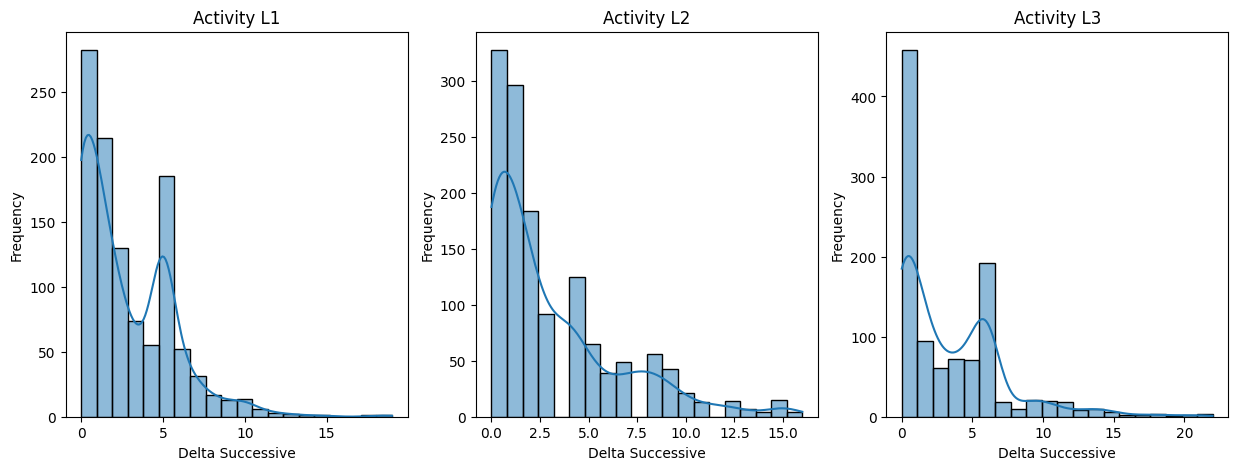

In [78]:
plots_distribution([robotarm_all_l1, robotarm_all_l2, robotarm_all_l3], 'Submission_TreeDist_Successive')

In [79]:
global_mins_code = []

for df in [robotarm_all_l1, robotarm_all_l2, robotarm_all_l3]:
    min_kde_value = find_minimum(df, 'Submission_TreeDist_Successive')
    global_mins_code.append(min_kde_value)
    print(f"Global minimum of the KDE curve for task :", min_kde_value)

Local minima of the KDE curve:
x = 3.4994994994994997
x = 16.50850850850851
Global minimum of the KDE curve for task : 3.4994994994994997
Local minima of the KDE curve:
x = 6.5025025025025025
x = 13.645645645645645
Global minimum of the KDE curve for task : 6.5025025025025025
Local minima of the KDE curve:
x = 3.5895895895895897
x = 8.786786786786786
x = 12.596596596596596
x = 19.555555555555557
Global minimum of the KDE curve for task : 3.5895895895895897


In [80]:
global_mins_code

[3.4994994994994997, 6.5025025025025025, 3.5895895895895897]

In [81]:
for df, thresh in zip([robotarm_l1, robotarm_l2, robotarm_l3], global_mins_code):
    df['bucket_code_successive'] = df['Submission_TreeDist_Successive'].apply(lambda x: "low" if x <= thresh else "high")

In [82]:
robotarm = pd.concat([robotarm_l1, robotarm_l2, robotarm_l3])
robotarm.to_csv("../data/robotarm.csv", index=False)

In [83]:
robotarm_all = robotarm[robotarm['activity_all'] == '123']
robotarm_all.to_csv("../data/robotarm_all.csv", index=False)

## Median split

In [13]:
robotarm = pd.read_csv("../data/robotarm.csv")

In [14]:
robotarm_l1 = robotarm[robotarm['activity'] == 1]
robotarm_l2 = robotarm[robotarm['activity'] == 2]
robotarm_l3 = robotarm[robotarm['activity'] == 3]


Text(0, 0.5, 'Delta Successive')

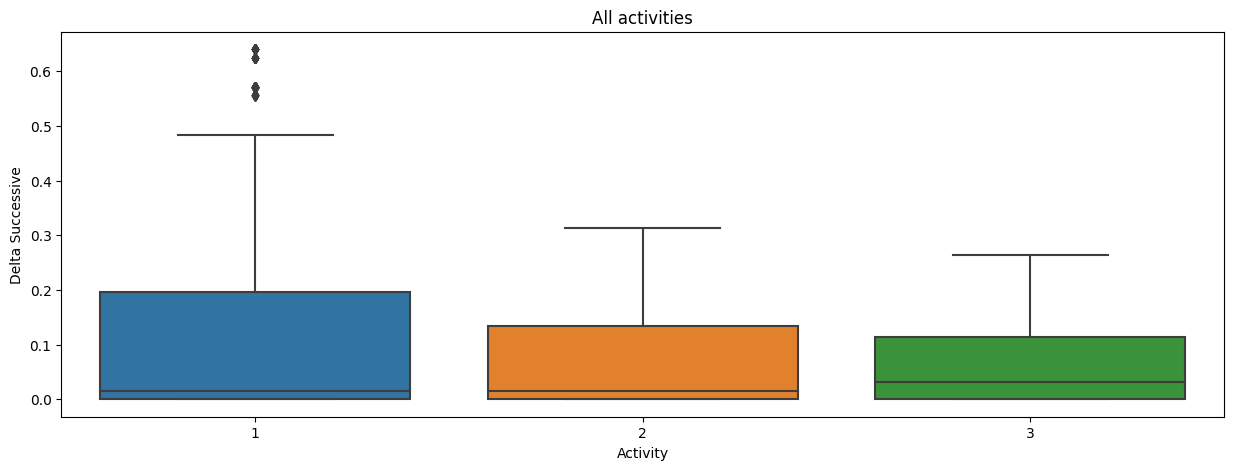

In [15]:
# boxplot of the delta_successive
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='activity', y='delta_successive', data=robotarm, ax=ax)
ax.set_title("All activities")
ax.set_xlabel("Activity")
ax.set_ylabel("Delta Successive")


Text(0, 0.5, 'Delta Successive')

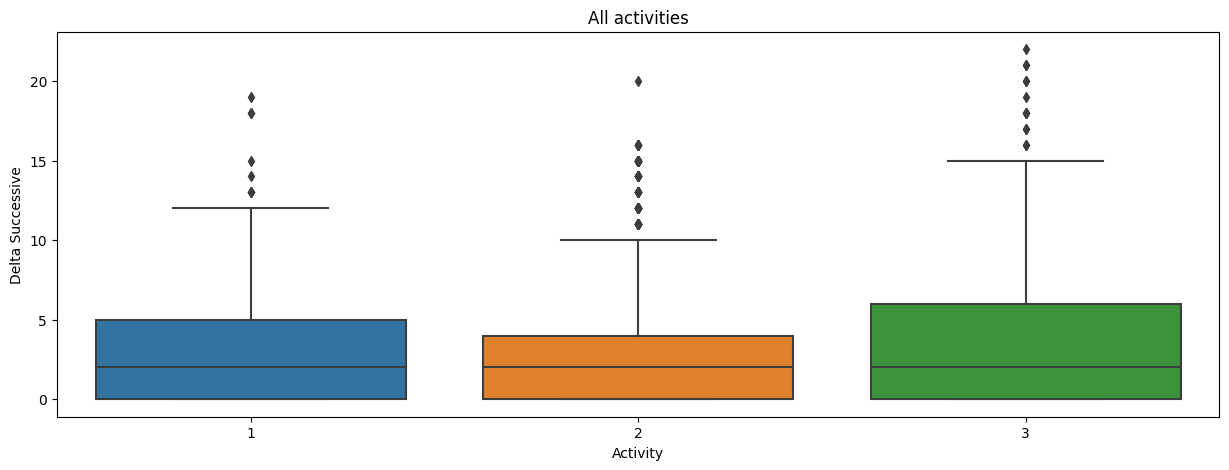

In [16]:
# boxplot of the delta_successive
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='activity', y='Submission_TreeDist_Successive', data=robotarm, ax=ax)
ax.set_title("All activities")
ax.set_xlabel("Activity")
ax.set_ylabel("Delta Successive")


In [17]:
successive_medians = []
code_successive_medians = []

for df in [robotarm_l1, robotarm_l2, robotarm_l3]:
    successive_medians.append(df['delta_successive'].median())
    code_successive_medians.append(df['Submission_TreeDist_Successive'].median())


In [18]:
successive_medians

[0.0156173761888606, 0.0156173761888606, 0.0312347523777212]

In [89]:
for df, median in zip([robotarm_l1, robotarm_l2, robotarm_l3], successive_medians):
    df['median_split_delta_successive'] = df['delta_successive'].apply(lambda x: "low" if x <= median else "high")

In [90]:
for df, median in zip([robotarm_l1, robotarm_l2, robotarm_l3], code_successive_medians):
    df['median_split_code_successive'] = df['Submission_TreeDist_Successive'].apply(lambda x: "low" if x <= median else "high")

In [91]:
robotarm = pd.concat([robotarm_l1, robotarm_l2, robotarm_l3])
robotarm.to_csv("../data/robotarm.csv", index=False)

In [92]:
robotarm.columns

Index(['Student ID', 'WorldSpace', 'index', 'Submission_TreeDist_Successive',
       'nb_tentative', 'pct_activity', 'error', 'missing', 'move1', 'move2',
       'pickup1', 'place1', 'nb_error', 'nb_missing', 'nb_move1', 'nb_move2',
       'nb_pickup1', 'nb_place1', 'pct_error', 'pct_missing', 'pct_move1',
       'pct_move2', 'pct_pickup1', 'pct_place1', 'euclidean_distance',
       'delta_successive', 'success', 'has_error', 'activity', 'seq_error',
       'case1', 'case2', 'case3', 'cases', 'activity_all',
       'bucket_delta_successive', 'bucket_code_successive',
       'median_split_delta_successive', 'median_split_code_successive'],
      dtype='object')

## Group 123

In [93]:
robotarm_all = robotarm[robotarm['activity_all'] == 123]

Text(0, 0.5, 'Delta Successive')

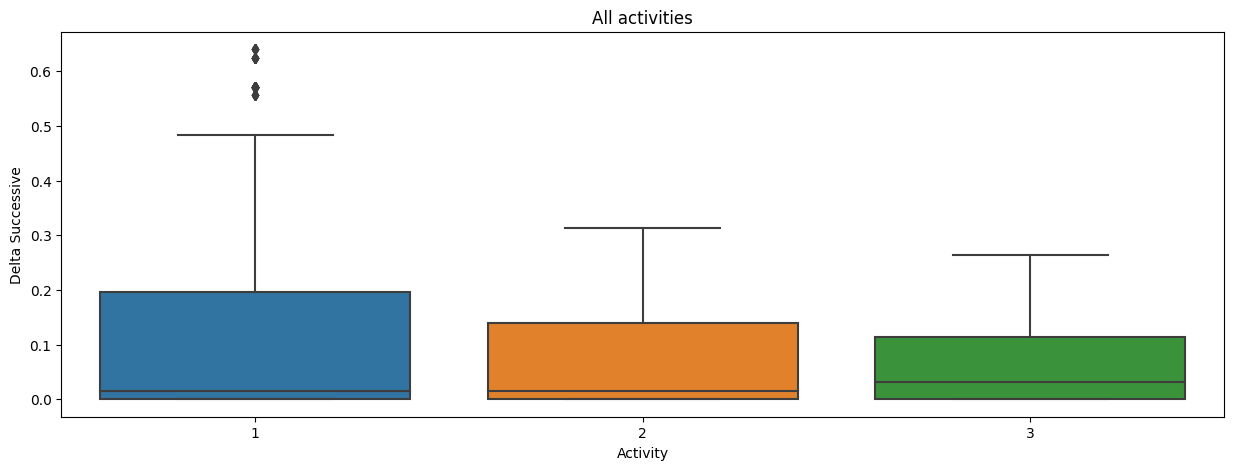

In [94]:
# boxplot of number of delta_successive
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(x='activity', y='delta_successive', data=robotarm_all, ax=ax)
ax.set_title("All activities")
ax.set_xlabel("Activity")
ax.set_ylabel("Delta Successive")


In [95]:
robotarm_all_l1 = robotarm_all[robotarm_all['activity'] == 1]
robotarm_all_l2 = robotarm_all[robotarm_all['activity'] == 2]
robotarm_all_l3 = robotarm_all[robotarm_all['activity'] == 3]

successive_medians = []

for df in [robotarm_all_l1, robotarm_all_l2, robotarm_all_l3]:
    print(df['delta_successive'].median())

0.0156173761888606
0.0156173761888606
0.0312347523777212


# box plot of nb_tentatives

Text(0, 0.5, 'Total Tentatives')

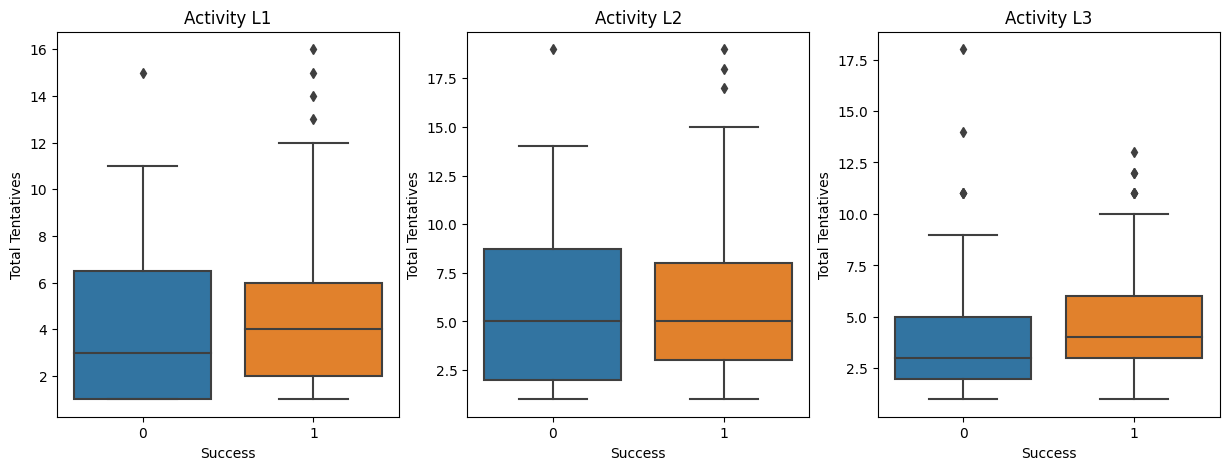

In [96]:
robotarm_all_l1_per_student = robotarm_all_l1.groupby('Student ID').agg({'nb_tentative': 'max', 'activity': 'max', 'success': 'max'}).reset_index()
robotarm_all_l2_per_student = robotarm_all_l2.groupby('Student ID').agg({'nb_tentative': 'max', 'activity': 'max', 'success': 'max'}).reset_index()
robotarm_all_l3_per_student = robotarm_all_l3.groupby('Student ID').agg({'nb_tentative': 'max', 'activity': 'max', 'success': 'max'}).reset_index()

robotarm_all_per_student = pd.concat([robotarm_all_l1_per_student, robotarm_all_l2_per_student, robotarm_all_l3_per_student])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='success', y='nb_tentative', data=robotarm_all_l1_per_student, ax=ax[0])
ax[0].set_title("Activity L1")
ax[0].set_xlabel("Success")
ax[0].set_ylabel("Total Tentatives")

sns.boxplot(x='success', y='nb_tentative', data=robotarm_all_l2_per_student, ax=ax[1])
ax[1].set_title("Activity L2")
ax[1].set_xlabel("Success")
ax[1].set_ylabel("Total Tentatives")

sns.boxplot(x='success', y='nb_tentative', data=robotarm_all_l3_per_student, ax=ax[2])
ax[2].set_title("Activity L3")
ax[2].set_xlabel("Success")
ax[2].set_ylabel("Total Tentatives")

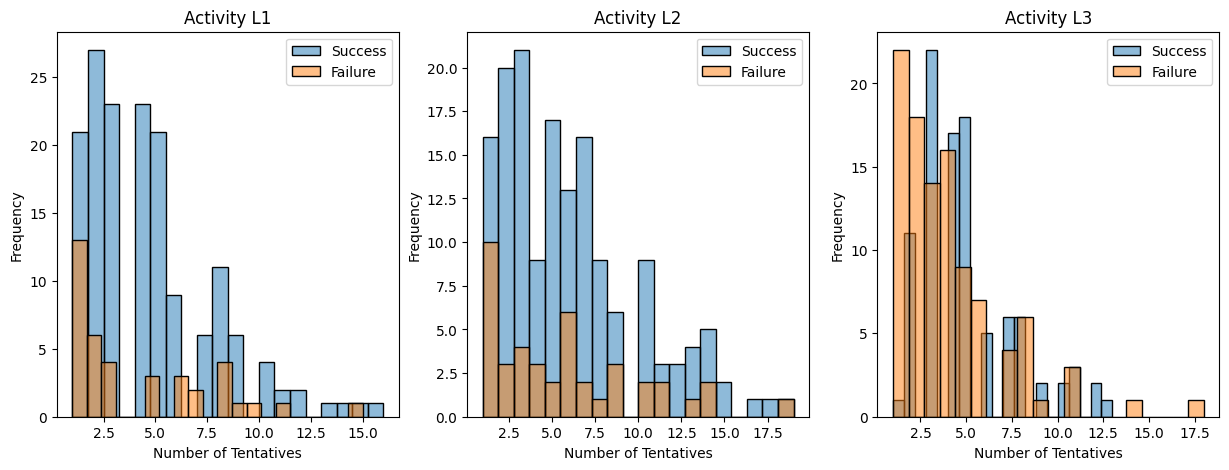

In [97]:
# histogram of the number of tentatives
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(robotarm_all_l1_per_student[robotarm_all_l1_per_student['success'] == 1]['nb_tentative'], bins=20, ax=ax[0], label='Success', alpha=0.5)
sns.histplot(robotarm_all_l1_per_student[robotarm_all_l1_per_student['success'] == 0]['nb_tentative'], bins=20, ax=ax[0], label='Failure', alpha=0.5)
ax[0].set_title("Activity L1")
ax[0].set_xlabel("Number of Tentatives")
ax[0].set_ylabel("Frequency")
ax[0].legend()

sns.histplot(robotarm_all_l2_per_student[robotarm_all_l2_per_student['success']  == 1]['nb_tentative'], bins=20, ax=ax[1], label='Success', alpha=0.5)
sns.histplot(robotarm_all_l2_per_student[robotarm_all_l2_per_student['success'] == 0]['nb_tentative'], bins=20, ax=ax[1], label='Failure', alpha=0.5)
ax[1].set_title("Activity L2")
ax[1].set_xlabel("Number of Tentatives")
ax[1].set_ylabel("Frequency")
ax[1].legend()

sns.histplot(robotarm_all_l3_per_student[robotarm_all_l3_per_student['success'] == 1]['nb_tentative'], bins=20, ax=ax[2], label='Success', alpha=0.5)
sns.histplot(robotarm_all_l3_per_student[robotarm_all_l3_per_student['success'] == 0]['nb_tentative'], bins=20, ax=ax[2], label='Failure', alpha=0.5)
ax[2].set_title("Activity L3")
ax[2].set_xlabel("Number of Tentatives")
ax[2].set_ylabel("Frequency")
ax[2].legend()

plt.show()

In [9]:
import pandas as pd

robotarm = pd.read_csv("../data/robotarm.csv")

In [10]:
robotarm_l1 = robotarm[robotarm['activity'] == 1]
robotarm_l2 = robotarm[robotarm['activity'] == 2]
robotarm_l3 = robotarm[robotarm['activity'] == 3]

In [31]:
# remove the first 2 rows of each student
robotarm_l1 = robotarm_l1.groupby('Student ID').apply(lambda x: x.iloc[3:]).reset_index(drop=True)
robotarm_l2 = robotarm_l2.groupby('Student ID').apply(lambda x: x.iloc[3:]).reset_index(drop=True)
robotarm_l3 = robotarm_l3.groupby('Student ID').apply(lambda x: x.iloc[3:]).reset_index(drop=True)

In [35]:
robotarm_r3 = pd.concat([robotarm_l1, robotarm_l2, robotarm_l3])
robotarm_r3.to_csv("../data/robotarm_r3.csv", index=False)

In [42]:
# remove the last 2 rows of each student
robotarm_l1 = robotarm_l1.groupby('Student ID').apply(lambda x: x.iloc[:-4]).reset_index(drop=True)
robotarm_l2 = robotarm_l2.groupby('Student ID').apply(lambda x: x.iloc[:-4]).reset_index(drop=True)
robotarm_l3 = robotarm_l3.groupby('Student ID').apply(lambda x: x.iloc[:-4]).reset_index(drop=True)

In [43]:
robotarm_last3 = pd.concat([robotarm_l1, robotarm_l2, robotarm_l3])
robotarm_last3.to_csv("../data/robotarm_last3.csv", index=False)

In [5]:
robotarm.columns 

Index(['Student ID', 'WorldSpace', 'index', 'Submission_TreeDist_Successive',
       'nb_tentative', 'pct_activity', 'error', 'missing', 'move1', 'move2',
       'pickup1', 'place1', 'nb_error', 'nb_missing', 'nb_move1', 'nb_move2',
       'nb_pickup1', 'nb_place1', 'pct_error', 'pct_missing', 'pct_move1',
       'pct_move2', 'pct_pickup1', 'pct_place1', 'euclidean_distance',
       'delta_successive', 'success', 'has_error', 'activity', 'seq_error',
       'case1', 'case2', 'case3', 'cases', 'activity_all',
       'bucket_delta_successive', 'bucket_Submission_TreeDist_Successive',
       'median_split_delta_successive',
       'median_split_Submission_TreeDist_Successive', 'at_least_2_tentatives'],
      dtype='object')

In [6]:
# compute overall error rate for robotarm_l1, robotarm_l2, robotarm_l3
error_rate_l1 = robotarm_l1['pct_error'].mean()
error_rate_l2 = robotarm_l2['pct_error'].mean()
error_rate_l3 = robotarm_l3['pct_error'].mean()

print(f"Error rate for L1: {error_rate_l1}")
print(f"Error rate for L2: {error_rate_l2}")
print(f"Error rate for L3: {error_rate_l3}")

Error rate for L1: 0.4121298649293107
Error rate for L2: 0.2809565312030323
Error rate for L3: 0.18298682004297195


In [11]:
# length of the dataset

len(robotarm_l1), len(robotarm_l2), len(robotarm_l3)

(2078, 2098, 1211)

In [7]:
robotarm_at_least_2_tentatives = robotarm[robotarm['nb_tentative'] >= 2]

robotarm_l1 = robotarm_at_least_2_tentatives[robotarm_at_least_2_tentatives['activity'] == 1]
robotarm_l2 = robotarm_at_least_2_tentatives[robotarm_at_least_2_tentatives['activity'] == 2]
robotarm_l3 = robotarm_at_least_2_tentatives[robotarm_at_least_2_tentatives['activity'] == 3]

In [8]:
# length of the dataset

len(robotarm_l1), len(robotarm_l2), len(robotarm_l3)

(1948, 1996, 1151)